In [1]:
import os
import glob
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Lire les colonnes pour savoir combien il y en a
initial_df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', nrows=1)

In [2]:
total_cols = len(initial_df.columns)

# Déclarer les indices des colonnes à enlever
to_remove_cols = [
    0,    1,    2,    3,    4,    5,    6,    8,    9,
    10,    11,    12,    13,    14,    15,    16,    17,    18,    19,
    20,    21,    22,    23,    24,    25,    26,    27,    28,    29,
    30,    31,    32,    33,    34,    35,    36,    37,    38,    39,
    40, 41, 43, 44, 46, 47, 48, 49,
    50, 51, 52, 54, 55, 56, 57, 58, 59,
    60, 61, 62
]

# Créer la liste des indices de colonnes à garder
to_keep_cols = [i for i in range(total_cols) if i not in to_remove_cols]

# Lire le CSV en gardant uniquement les colonnes souhaitées
df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', usecols=to_keep_cols)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 103 entries, product_name to water-hardness_100g
dtypes: float64(100), object(3)
memory usage: 252.1+ MB


In [4]:
# list columns and their types
df.dtypes

product_name                object
additives_n                float64
additives_fr                object
nutrition_grade_fr          object
energy_100g                float64
                            ...   
carbon-footprint_100g      float64
nutrition-score-fr_100g    float64
nutrition-score-uk_100g    float64
glycemic-index_100g        float64
water-hardness_100g        float64
Length: 103, dtype: object

In [5]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Load your data
# df = pd.read_csv('your_data.csv')

# Drop columns with too many missing values and non-numeric columns
#df.dropna(thresh=len(df) * 0.9, axis=1, inplace=True)

#df.dtypes

In [6]:
df = df.dropna(subset=['nutrition_grade_fr'])

# Separate features and target
X = df.drop(['nutrition_grade_fr', 'product_name', 'additives_fr', 'nutrition-score-fr_100g', 'nutrition-score-uk_100g'], axis=1)
y = df['nutrition_grade_fr']



In [7]:
# Drop columns which contain no value at all
X.dropna(how='all', axis=1, inplace=True)

In [8]:
X.describe().to_csv('data/describe.csv')

In [9]:
# For each column, replace missing values with the median of the column
# Like this : df['sugars_100g'].fillna(df['sugars_100g'].median(), inplace=True)
for col in X.columns:
    X[col].fillna(X[col].median(), inplace=True)

In [10]:
X.describe()

,additives_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,lauric-acid_100g,arachidic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,...,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g
count,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,...,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000
mean,1.870892,1.196344e+03,300.838101,12.875059,4.967372,24.522365,6.400000e-02,3.685760,2.081781,1.804791,...,0.000024,3.210005e-05,0.000030,0.021068,0.039012,7.699997,17.166547,15.000389,49.996723,199.457167
std,2.399535,6.986588e+03,39.540671,15.645497,7.657164,0.073601,5.551128e-17,3.771972,2.677705,0.346962,...,0.000064,1.843350e-07,0.000024,0.015810,0.002146,0.002569,3.905601,0.091647,1.170905,15.104349
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.044730,6.400000e-02,0.000000,0.000000,0.000000,...,0.000007,4.700000e-06,0.000000,0.000000,0.001800,6.600000,0.000000,8.000000,6.000000,0.000000
25%,0.000000,4.520000e+02,300.000000,1.170000,0.000000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
50%,1.000000,1.195000e+03,300.000000,7.140000,1.790000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
75%,3.000000,1.715000e+03,300.000000,20.000000,7.140000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
max,31.000000,3.251373e+06,3590.000000,714.290000,550.000000,49.000000,6.400000e-02,557.140000,75.000000,60.000000,...,0.030000,1.040000e-04,0.005000,4.000000,0.423000,8.200000,100.000000,25.000000,100.000000,2842.000000


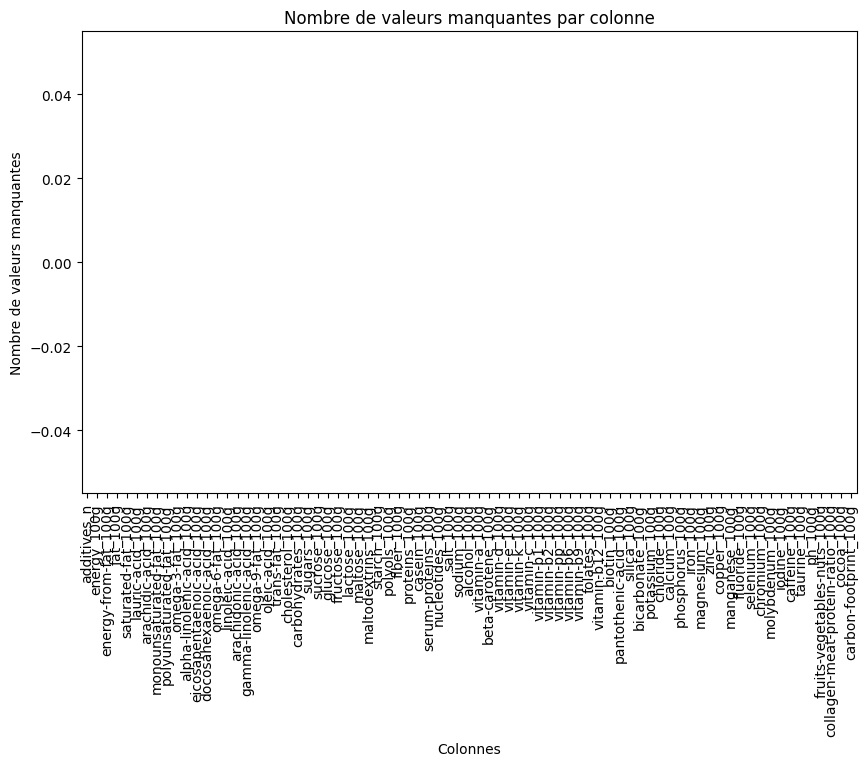

In [11]:
import matplotlib.pyplot as plt

# Compter les valeurs manquantes pour chaque colonne
missing_values = X.isna().sum()

# Afficher graphiquement
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Nombre de valeurs manquantes par colonne')
plt.xlabel('Colonnes')
plt.ylabel('Nombre de valeurs manquantes')
plt.show()

In [12]:
# enlever la colone trans-fat_100g de X
X.drop('trans-fat_100g', axis=1, inplace=True)

In [13]:
X.describe()

,additives_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,lauric-acid_100g,arachidic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,...,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g
count,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,...,221210.000000,2.212100e+05,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000,221210.000000
mean,1.870892,1.196344e+03,300.838101,12.875059,4.967372,24.522365,6.400000e-02,3.685760,2.081781,1.804791,...,0.000024,3.210005e-05,0.000030,0.021068,0.039012,7.699997,17.166547,15.000389,49.996723,199.457167
std,2.399535,6.986588e+03,39.540671,15.645497,7.657164,0.073601,5.551128e-17,3.771972,2.677705,0.346962,...,0.000064,1.843350e-07,0.000024,0.015810,0.002146,0.002569,3.905601,0.091647,1.170905,15.104349
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.044730,6.400000e-02,0.000000,0.000000,0.000000,...,0.000007,4.700000e-06,0.000000,0.000000,0.001800,6.600000,0.000000,8.000000,6.000000,0.000000
25%,0.000000,4.520000e+02,300.000000,1.170000,0.000000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
50%,1.000000,1.195000e+03,300.000000,7.140000,1.790000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
75%,3.000000,1.715000e+03,300.000000,20.000000,7.140000,24.522365,6.400000e-02,3.330000,1.790000,1.800000,...,0.000023,3.210000e-05,0.000030,0.021000,0.039000,7.700000,17.000000,15.000000,50.000000,199.300000
max,31.000000,3.251373e+06,3590.000000,714.290000,550.000000,49.000000,6.400000e-02,557.140000,75.000000,60.000000,...,0.030000,1.040000e-04,0.005000,4.000000,0.423000,8.200000,100.000000,25.000000,100.000000,2842.000000


In [14]:
# Write X.describe() result to a csv file
X.describe().to_csv('data/X_describe.csv')

In [15]:
if y.isna().any():
    print("y contains NaN values.")

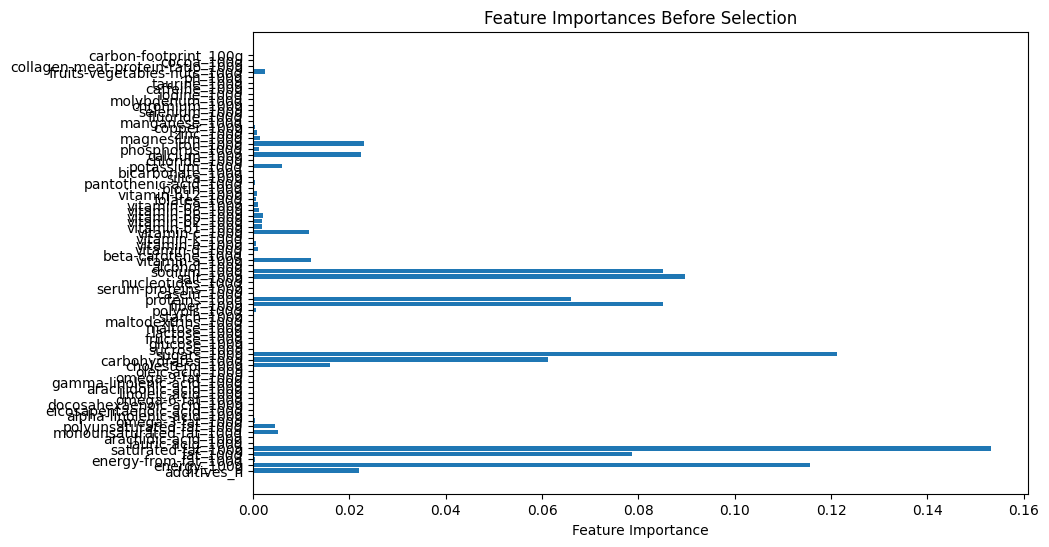

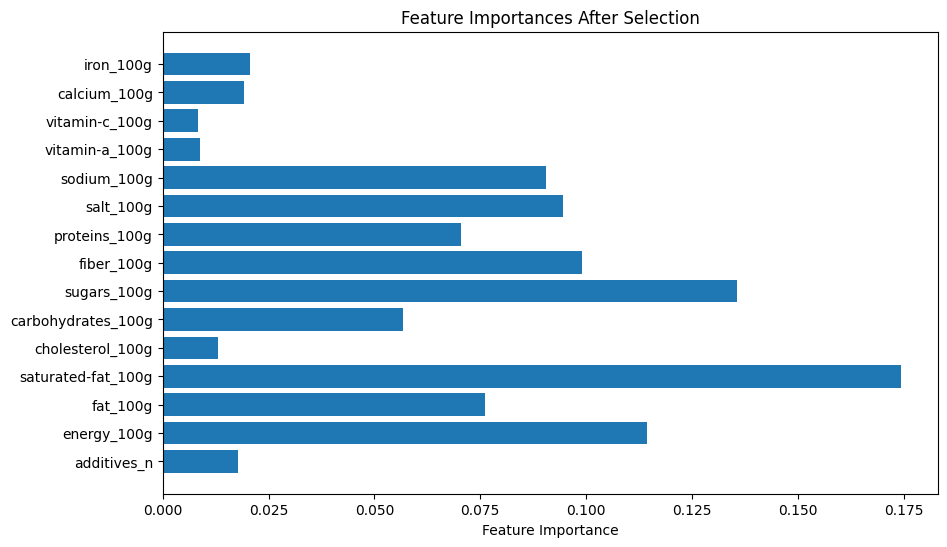

In [16]:
# Use RandomForest model to evaluate feature importances
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X, y)

# Plot feature importances before selection
importances = clf.feature_importances_
features_before = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features_before, importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances Before Selection')
plt.show()

# Use SelectFromModel to select important features
sfm = SelectFromModel(clf, threshold=0.01)  # Adjust the threshold as needed
sfm.fit(X, y)

# Create new DataFrame with selected features
X_important = sfm.transform(X)
selected_features = X.columns[sfm.get_support()]

# Plot feature importances after selection
clf.fit(X_important, y)
importances_after = clf.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(selected_features, importances_after)
plt.xlabel('Feature Importance')
plt.title('Feature Importances After Selection')
plt.show()


In [17]:
initial_df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', nrows=1)

# list the columns indices to keep
to_keep_cols = [i for i in range(len(initial_df.columns)) if initial_df.columns[i] in selected_features]

to_keep_cols

[42, 63, 65, 66, 100, 101, 102, 111, 112, 116, 117, 119, 124, 138, 140]

In [27]:
to_keep_cols = [7, 42, 53, 63, 65, 66, 100, 101, 102, 111, 112, 116, 117, 119, 124, 138, 140]

In [28]:
df = pd.read_csv('data/fr.openfoodfacts.org.products.csv', sep='\t', usecols=to_keep_cols)

In [29]:
df.describe()

,additives_n,energy_100g,fat_100g,saturated-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
count,248939.000000,2.611130e+05,243891.000000,229554.000000,144090.000000,243588.000000,244971.000000,200886.000000,259922.000000,255510.000000,255463.000000,137554.000000,140867.000000,141050.000000,140462.000000
mean,1.936024,1.141915e+03,12.730379,5.129932,0.020071,32.073981,16.003484,2.862111,7.075940,2.028624,0.798815,0.000397,0.023367,0.125163,0.003652
std,2.502019,6.447154e+03,17.578747,8.014238,0.358062,29.731719,22.327284,12.867578,8.409054,128.269454,50.504428,0.073278,2.236451,3.318263,0.214408
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260
25%,0.000000,3.770000e+02,0.000000,0.000000,0.000000,6.000000,1.300000,0.000000,0.700000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.100000e+03,5.000000,1.790000,0.000000,20.600000,5.710000,1.500000,4.760000,0.581660,0.229000,0.000000,0.000000,0.035000,0.001010
75%,3.000000,1.674000e+03,20.000000,7.140000,0.020000,58.330000,24.000000,3.600000,10.000000,1.374140,0.541000,0.000107,0.003700,0.106000,0.002400
max,31.000000,3.251373e+06,714.290000,550.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000


In [30]:
# list column names and their types
df.dtypes

product_name           object
additives_n           float64
nutrition_grade_fr     object
energy_100g           float64
fat_100g              float64
saturated-fat_100g    float64
cholesterol_100g      float64
carbohydrates_100g    float64
sugars_100g           float64
fiber_100g            float64
proteins_100g         float64
salt_100g             float64
sodium_100g           float64
vitamin-a_100g        float64
vitamin-c_100g        float64
calcium_100g          float64
iron_100g             float64
dtype: object

In [31]:
# write the result to a csv file named 'df_selection.csv'
df.to_csv('data/df_selection.csv')